## Task

Create a pricing model, which can predict the acceptable per night price for Airbnb apartment
based on its properties and the offered amenities.

Data you can find here http://insideairbnb.com/get-the-data.html

## Loading data

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

data = pd.read_csv('../../../Downloads/listings.csv')
data.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,673276379194656210,https://www.airbnb.com/rooms/673276379194656210,20220910194401,2022-09-10,city scrape,Habitación muy acogedora.,Abrace la simplicidad en este lugar tranquilo ...,El barrio es tranquilo y bien hubicado. Cerc...,https://a0.muscache.com/pictures/miso/Hosting-...,51421682,https://www.airbnb.com/users/show/51421682,Maria Das Merces,2015-12-15,NaN,Sou Bailarina y Terapeuta Integrativa. Trabalh...,within an hour,100%,100%,f,https://a0.muscache.com/im/pictures/user/709d3...,https://a0.muscache.com/im/pictures/user/709d3...,NaN,1.0,1.0,"['email', 'phone']",t,t,"L'Hospitalet de Llobregat, Catalunya, Spain",la Bordeta,Sants-Montjuïc,41.363004,2.125326,Private room in condo,Private room,2,NaN,1 shared bath,2.0,2.0,"[""Ethernet connection"", ""Hangers"", ""Hot water ...",$59.00,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,18,48,78,351,2022-09-10,9,9,9,2022-08-11,2022-09-08,4.89,4.89,5.00,5.00,4.89,4.89,4.78,Exempt,t,1,0,1,0,9.00
1,44192271,https://www.airbnb.com/rooms/44192271,20220910194401,2022-09-10,city scrape,Cozy terrace apartment Apartamento con patio,A private terraced + 2 bedroom ground floor ap...,The neighbourhood is quiet with trees. Though ...,https://a0.muscache.com/pictures/2e579e6b-b717...,200754964,https://www.airbnb.com/users/show/200754964,Nuria,2018-07-08,"Barcelona, Spain",I live in Barcelona. I love travelling and mee...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/0e6be...,https://a0.muscache.com/im/pictures/user/0e6be...,NaN,1.0,1.0,"['email', 'phone']",t,t,"L'Hospitalet de Llobregat, Catalunya, Spain",la Maternitat i Sant Ramon,Les Corts,41.372630,2.113180,Entire condo,Entire home/apt,5,NaN,1 bath,2.0,4.0,"[""Fire extinguisher"", ""Stove"", ""Air conditioni...",$110.00,3,30,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,5,25,55,151,2022-09-10,54,40,4,2020-11-20,2022-08-26,4.83,4.89,4.70,5.00,4.98,4.52,4.65,HUTB-013294,f,1,1,0,0,2.45
2,17039441,https://www.airbnb.com/rooms/17039441,20220910194401,2022-09-10,city scrape,Apart. full equipped. 2 min to Subway lines L1...,Precioso apartamento ideal para parejas. Lumin...,La zona dispone de servicios básicos y una exc...,https://a0.muscache.com/pictures/02af8b09-c8ca...,114340651,https://www.airbnb.com/users/show/114340651,Pepa,2017-02-01,NaN,NaN,within a few hours,100%,97%,t,https://a0.muscache.com/im/pictures/user/8a1dc...,https://a0.muscache.com/im/pictures/user/8a1dc...,NaN,1.0,2.0,"['email', 'phone']",t,t,"L'Hospitalet de Llobregat, Catalunya, Spain",Sants - Badal,Sants-Montjuïc,41.366400,2.116860,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Stove"", ""Cooking basics"", ""Security cameras ...",$86.00,3,10,3.0,3.0,10

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16920 entries, 0 to 16919
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            16920 non-null  int64  
 1   listing_url                                   16920 non-null  object 
 2   scrape_id                                     16920 non-null  int64  
 3   last_scraped                                  16920 non-null  object 
 4   source                                        16920 non-null  object 
 5   name                                          16910 non-null  object 
 6   description                                   16834 non-null  object 
 7   neighborhood_overview                         9927 non-null   object 
 8   picture_url                                   16920 non-null  object 
 9   host_id                                       16920 non-null 

In [5]:
data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.692000e+04,1.692000e+04,1.692000e+04,16918.000000,16918.000000,16920.000000,16920.000000,16920.00000,0.0,16349.000000,16621.000000,16920.000000,16920.000000,16919.000000,16919.000000,16919.000000,1.691900e+04,16919.000000,1.691900e+04,0.0,16920.000000,16920.000000,16920.000000,16920.000000,16920.000000,16920.000000,16920.000000,13306.000000,13205.000000,13206.000000,13201.000000,13207.000000,13201.000000,13201.000000,16920.000000,16920.000000,16920.000000,16920.000000,13306.000000
mean,1.146584e+17,2.022091e+13,1.380431e+08,28.257004,163.317236,41.391507,2.165119,3.48682,NaN,1.741758,2.443475,13.270449,651.351300,13.042319,17.839293,707.607365,2.546208e+05,16.052964,2.540182e+05,NaN,7.072813,19.857506,36.978073,170.815012,41.029137,11.112234,1.108865,4.526059,4.634673,4.580107,4.715907,4.710401,4.717306,4.470455,19.506619,16.617849,2.713239,0.091785,1.415639
std,2.457373e+17,0.000000e+00,1.448829e+08,62.670485,1468.452194,0.016357,0.022847,2.20731,NaN,1.052677,1.902246,30.233280,473.778836,31.375845,47.056174,478.008962,2.334772e+07,44.500282,2.329490e+07,NaN,8.627074,19.294580,30.557981,132.341829,77.338621,21.965633,2.118169,0.644020,0.514721,0.536042,0.464637,0.482997,0.407053,0.541938,35.142606,34.210763,11.323094,0.787576,1.790187
min,1.867400e+04,2.022091e+13,3.073000e+03,1.000000,1.000000,41.319310,2.045080,0.00000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,1.842040e+07,2.022091e+13,9.667715e+06,1.000000,2.000000,41.379995,2.155090,2.00000,NaN,1.000000,1.000000,1.000000,180.000000,1.000000,2.000000,300.000000,3.650000e+02,2.000000,3.300000e+02,NaN,0.000000,0.000000,0.000000,39.000000,1.000000,0.000000,0.000000,4.400000,4.530000,4.460000,4.660000,4.650000,4.630000,4.330000,1.000000,0.000000,0.000000,0.000000,0.250000
50%,3.590547e+07,2.022091e+13,7.828806e+07,5.000000,7.000000,41.389200,2.167215,3.00000,NaN,1.000000,2.000000,3.000000,365.000000,2.000000,4.000000,1125.000000,1.125000e+03,3.000000,1.125000e+03,NaN,4.000000,15.000000,39.000000,164.000000,7.000000,2.000000,0.000000,4.670000,4.780000,4.720000,4.860000,4.860000,4.830000,4.580000,4.000000,1.000000,0.000000,0.000000,0.890000
75%,5.127296e+07,2.022091e+13,2.453892e+08,23.000000,34.000000,41.401580,2.177470,5.00000,NaN,2.000000,3.000000,31.000000,1125.000000,31.000000,31.000000,1125.000000,1.125000e+03,31.000000,1.125000e+03,NaN,11.000000,36.000000,64.000000,308.000000,44.000000,15.000000,2.000000,4.890000,4.940000,4.920000,5.000000,5.000000,5.000000,4.790000,20.000000,16.000000,1.000000,0.000000,2.030000
max,7.127703e+17,2.022091e+13,4.785737e+08,810.000000,20000.000000,41.479980,2.232090,16.00000,NaN,20.000000,40.000000,1124.000000,3000.000000,1124.000000,1124.000000,3000.000000,2.147484e+09,1124.000000,2.142625e+09,NaN,30.000000,60.000000,90.000000,365.000000,1311.000000,832.000000,50.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,161.000000,161.000000,118.000000,12.000000,56.130000


## Data understanding

In [6]:
# based on the task and fast example I choose the most acceptible feature for baseline
init_features = ['host_since', 'neighbourhood_group_cleansed', 'room_type', 'host_response_rate', 
                 'host_acceptance_rate', 'host_is_superhost', 'host_identity_verified','accommodates',
                 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'host_has_profile_pic',
                 'number_of_reviews', 'review_scores_value', 'review_scores_rating',
                 'reviews_per_month', 'minimum_nights', 'maximum_nights', 'has_availability',
                 'availability_30', 'availability_60', 'availability_90', 'availability_365', 
                 'latitude', 'longitude',
                 'price',]

In [7]:
df = data[init_features]
df = df[df.host_since.notna()]  # remove rows with a lot of missing data about host
df.head(2)

,host_since,neighbourhood_group_cleansed,room_type,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,accommodates,bathrooms_text,bedrooms,beds,amenities,host_has_profile_pic,number_of_reviews,review_scores_value,review_scores_rating,reviews_per_month,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,latitude,longitude,price
0,2015-12-15,Sants-Montjuïc,Private room,100%,100%,f,t,2,1 shared bath,2.0,2.0,"[""Ethernet connection"", ""Hangers"", ""Hot water ...",t,9,4.78,4.89,9.00,1,1125,t,18,48,78,351,41.363004,2.125326,$59.00
1,2018-07-08,Les Corts,Entire home/apt,100%,100%,t,t,5,1 bath,2.0,4.0,"[""Fire extinguisher"", ""Stove"", ""Air conditioni...",t,54,4.65,4.83,2.45,3,30,t,5,25,55,151,41.372630,2.113180,$110.00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16918 entries, 0 to 16919
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_since                    16918 non-null  object 
 1   neighbourhood_group_cleansed  16918 non-null  object 
 2   room_type                     16918 non-null  object 
 3   host_response_rate            14078 non-null  object 
 4   host_acceptance_rate          14373 non-null  object 
 5   host_is_superhost             16916 non-null  object 
 6   host_identity_verified        16918 non-null  object 
 7   accommodates                  16918 non-null  int64  
 8   bathrooms_text                16907 non-null  object 
 9   bedrooms                      16347 non-null  float64
 10  beds                          16619 non-null  float64
 11  amenities                     16918 non-null  object 
 12  host_has_profile_pic          16918 non-null  object 
 13  n

In [9]:
df.describe()

,accommodates,bedrooms,beds,number_of_reviews,review_scores_value,review_scores_rating,reviews_per_month,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,latitude,longitude
count,16918.000000,16347.000000,16619.000000,16918.000000,13201.000000,13305.000000,13305.000000,16918.000000,16918.000000,16918.000000,16918.000000,16918.000000,16918.000000,16918.000000,16918.000000
mean,3.487055,1.741849,2.443589,41.033928,4.470455,4.526399,1.415744,13.271841,651.295307,7.073649,19.859853,36.982445,170.835205,41.391507,2.165121
std,2.207328,1.052710,1.902325,77.341937,0.541938,0.642848,1.790213,30.234796,473.778848,8.627241,19.294513,30.557142,132.336618,0.016357,0.022846
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,41.319310,2.045080
25%,2.000000,1.000000,1.000000,1.000000,4.330000,4.400000,0.250000,1.000000,180.000000,0.000000,0.000000,0.000000,39.000000,41.379992,2.155095
50%,3.000000,1.000000,2.000000,7.000000,4.580000,4.670000,0.890000,3.000000,365.000000,4.000000,15.000000,39.000000,164.000000,41.389200,2.167215
75%,5.000000,2.000000,3.000000,44.000000,4.790000,4.890000,2.030000,31.000000,1125.000000,11.000000,36.000000,64.000000,308.000000,41.401580,2.177470
max,16.000000,20.000000,40.000000,1311.000000,5.000000,5.000000,56.130000,1124.000000,3000.000000,30.000000,60.000000,90.000000,365.000000,41.479980,2.232090


In [10]:
df.describe(include='object')

,host_since,neighbourhood_group_cleansed,room_type,host_response_rate,host_acceptance_rate,host_is_superhost,host_identity_verified,bathrooms_text,amenities,host_has_profile_pic,has_availability,price
count,16918,16918,16918,14078,14373,16916,16918,16907,16918,16918,16918,16918
unique,3153,10,4,65,98,2,2,39,14648,2,2,683
top,2012-12-21,Eixample,Entire home/apt,100%,100%,f,t,1 bath,"[""Kitchen"", ""Hot water"", ""Long term stays allo...",t,t,$50.00
freq,162,5691,10046,8069,5142,14112,14562,6912,51,16811,16897,418


bedrooms


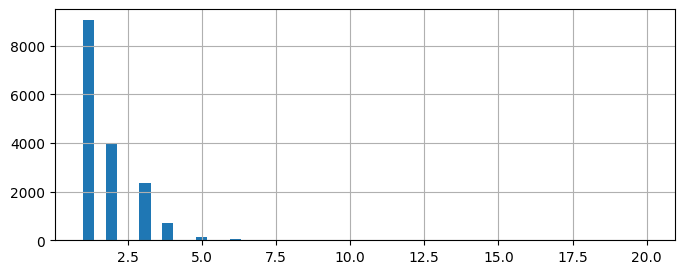

beds


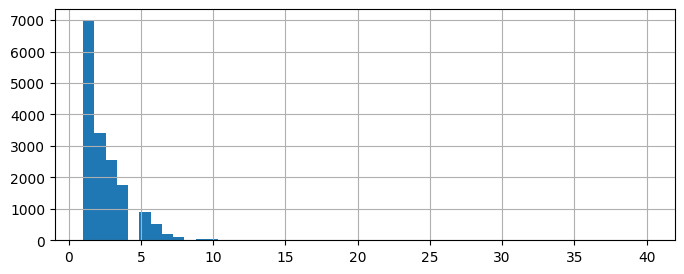

review_scores_value


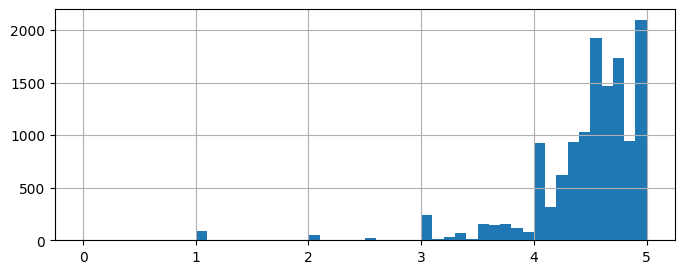

review_scores_rating


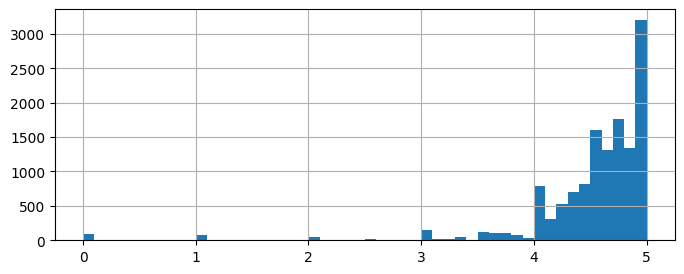

reviews_per_month


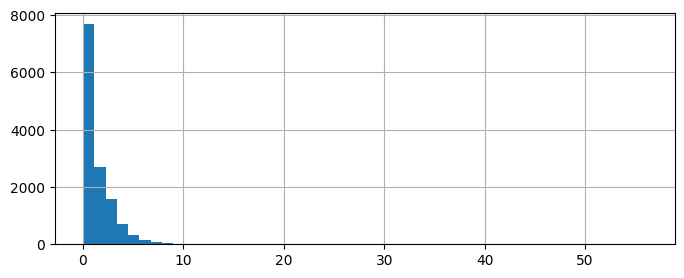

latitude


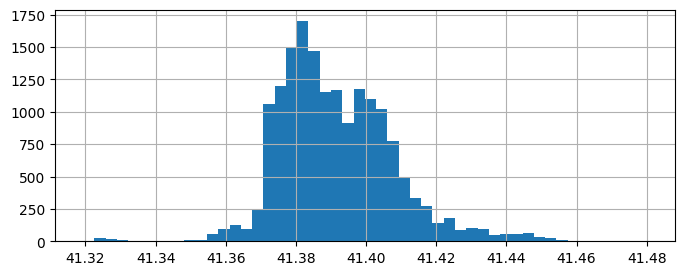

longitude


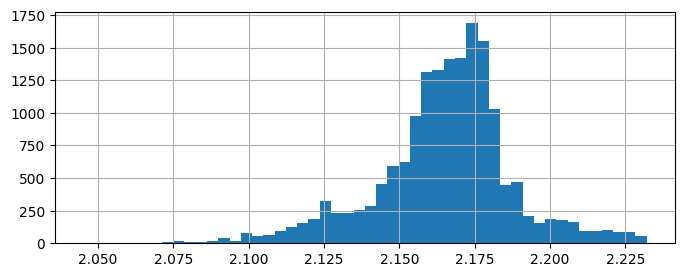

In [11]:
for col in df.columns:
    if df[col].dtype  == 'float64':
        print(col)
        plt.figure(figsize=(8, 3))
        df[col].hist(bins=50)
        plt.show()

In [ ]:
# sns.pairplot(df[features])

## Data preprocessing

In [13]:
# filling missing values

df['bedrooms'] = df.bedrooms.fillna(0)
df['beds'] = df.beds.fillna(data.beds.median())

In [14]:
# transforming features

df['days_lt'] = df.host_since.apply(lambda x: np.round((datetime.now() - pd.to_datetime(x)
                                                           ) / np.timedelta64(1,'D'), 1))

df['host_response_rate'] = df.host_response_rate.fillna('-100%').apply(lambda x: float(x[:-1]))
df['host_acceptance_rate'] = df.host_acceptance_rate.fillna('-100%').apply(lambda x: float(x[:-1]))
df['new_host'] = df.host_acceptance_rate.apply(lambda x: 1 if x == -100 else 0)

df['review_scores_value'] = df.review_scores_value.fillna(-5)
df['review_scores_rating'] = df.review_scores_rating.fillna(-5)

df['host_is_superhost'] = df.host_is_superhost.map({'t':1,'f':0}).fillna(0)
df['host_identity_verified'] = df.host_identity_verified.map({'t':1,'f':0})
df['has_availability'] = df.has_availability.map({'t':1,'f':0})
df['host_has_profile_pic'] = df.host_has_profile_pic.map({'t':1,'f':0})

df['amenities'] = df['amenities'].apply(lambda x: np.array(x[1:-1].replace('"', "").split(', ')))
top_amenities = (pd.Series(np.hstack(df['amenities'])).value_counts()[:50]).index
for am in top_amenities:
    df.loc[:, 'amenity_' + am.lower().replace(' ', '_')] = df.amenities.apply(lambda x: 1 if am in x else 0)
    
for am in data.neighbourhood_group_cleansed.unique():
    df.loc[:, 'neighbourhood_group_' + am.lower().replace(' ', '_')
            ] = df.neighbourhood_group_cleansed.apply(lambda x: 1 if am in x else 0)
    
for am in data.room_type.unique():
    df.loc[:, 'room_type_' + am.lower().replace(' ', '_')
            ] = df.room_type.apply(lambda x: 1 if am in x else 0)    
    
df['dist_to_sagrada_familia'] = df.apply(lambda x: geodesic( (41.403654, 2.175354), 
                                                            (x['latitude'], x['longitude'])).km, axis=1)


df['price'] = df['price'].apply(lambda x: float(x[1:].replace(',', '')))



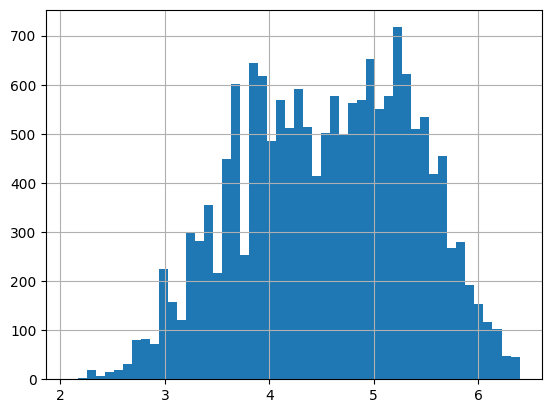

In [20]:
import numpy as np
np.log(df[df.price.between(1, df.price.quantile(0.98))].price).hist(bins= 50)
df['log_price'] = np.log(df[df.price.between(0, df.price.quantile(0.98))].price)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16918 entries, 0 to 16919
Data columns (total 95 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   host_since                               16918 non-null  object 
 1   neighbourhood_group_cleansed             16918 non-null  object 
 2   room_type                                16918 non-null  object 
 3   host_response_rate                       16918 non-null  float64
 4   host_acceptance_rate                     16918 non-null  float64
 5   host_is_superhost                        16918 non-null  float64
 6   host_identity_verified                   16918 non-null  int64  
 7   accommodates                             16918 non-null  int64  
 8   bathrooms_text                           16907 non-null  object 
 9   bedrooms                                 16918 non-null  float64
 10  beds                                     16918

In [22]:
# drop unnecessary columns
df.drop(['host_since', 'bathrooms_text', 'reviews_per_month', 'amenities'], axis=1, inplace=True)

/var/folders/91/n88r8vrj5qj_tgbhtng6bf080000gn/T/ipykernel_51348/1340698448.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()>0.85)


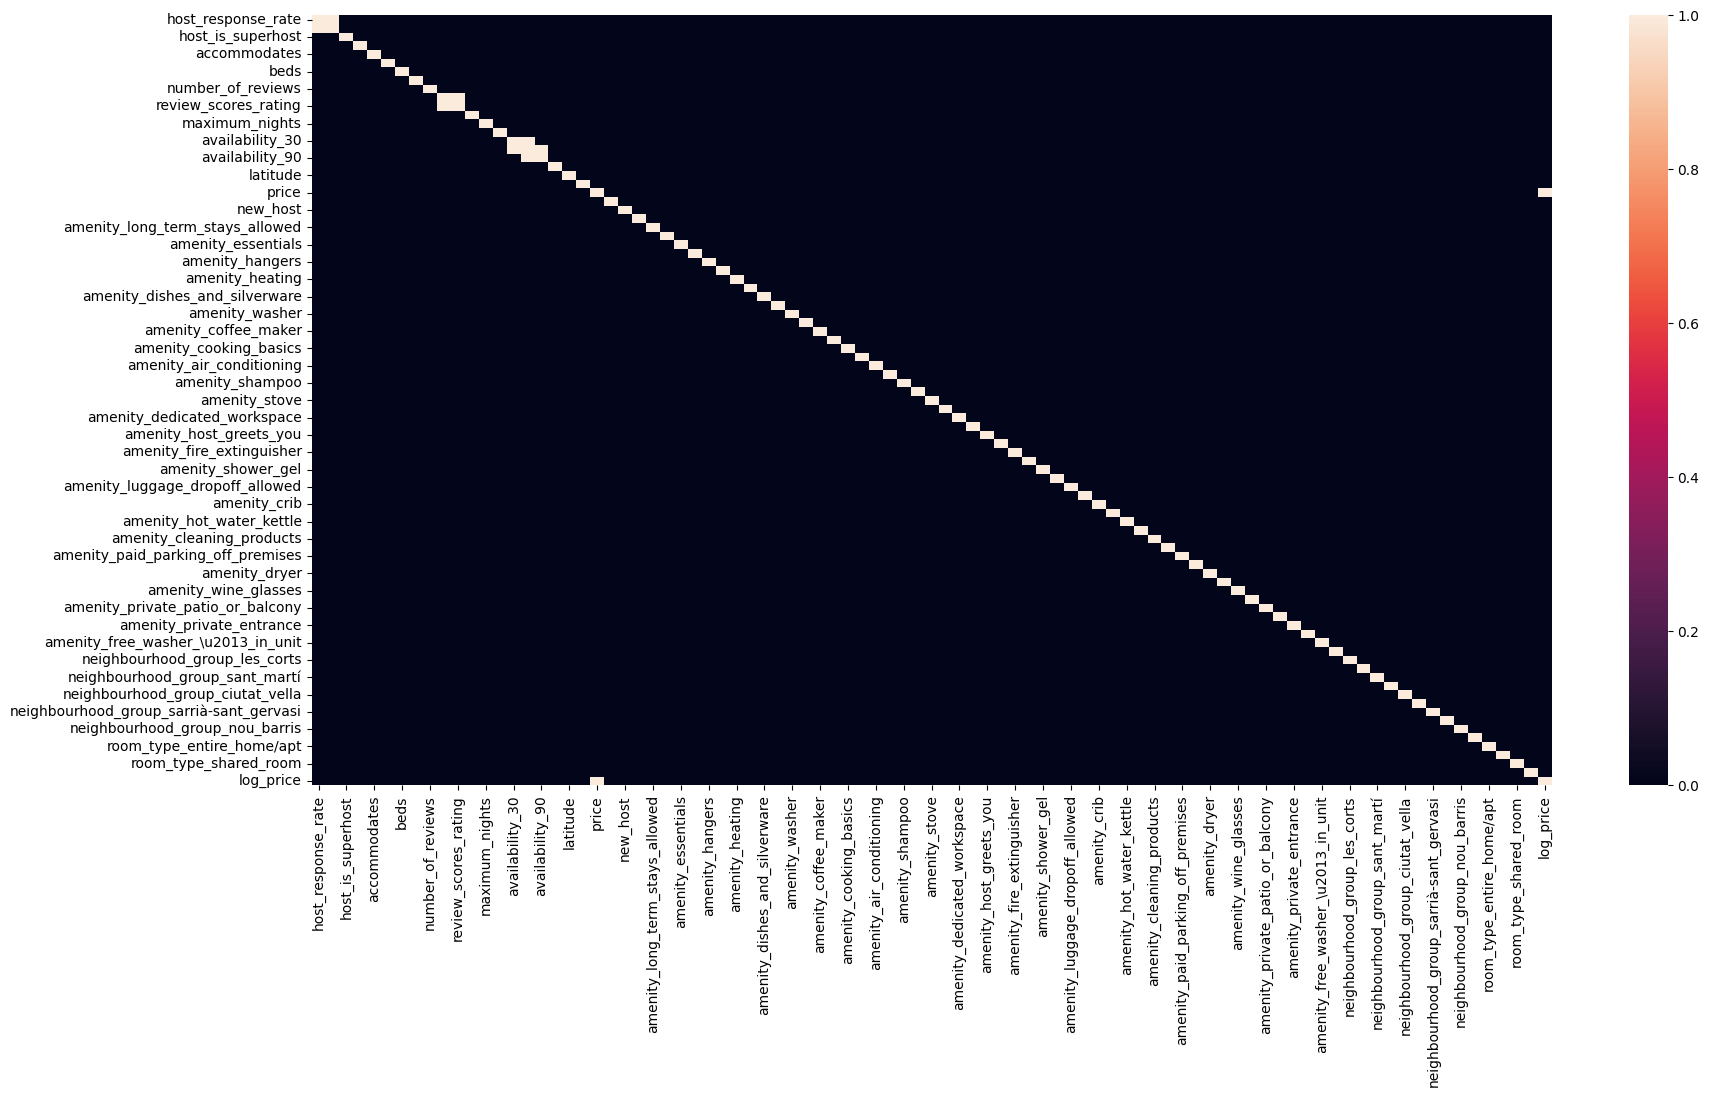

In [23]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(df.corr()>0.85)
plt.show()

Due to high correlation, we can remove next features:

    - host_acceptance_rate
    - review_scores_rating
    - availability_60

In [24]:
df.drop(['host_acceptance_rate', 'review_scores_rating', 'availability_60'], axis=1, inplace=True)

<AxesSubplot: >

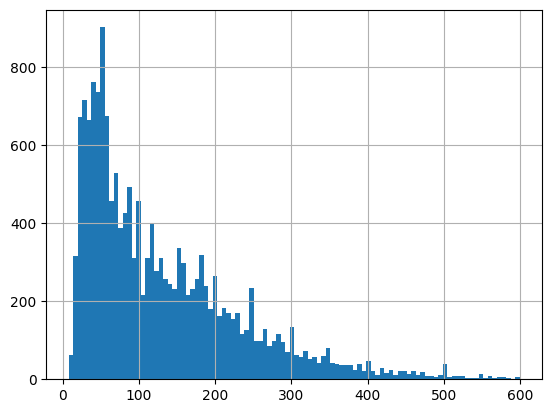

In [43]:
df.price.hist(bins=100)

In [25]:
# remove outliers for better predictions
df = df[df.price.between(1,df.price.quantile(0.98))]

## Baseline modelling

### RandomForest

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

features = ['host_response_rate',
            'host_is_superhost', 'host_identity_verified', 
            'accommodates', 
#           'bedrooms', 'beds', 
            'host_has_profile_pic', 'number_of_reviews', 
            'review_scores_value',
            'minimum_nights', 'maximum_nights', 
            'has_availability', 'availability_30', 'availability_90', 'availability_365', 
            'days_lt', 'new_host', 
            'dist_to_sagrada_familia',
            'neighbourhood_group_sants-montjuïc', 'neighbourhood_group_les_corts',
            'neighbourhood_group_eixample', 'neighbourhood_group_sant_martí',
            'neighbourhood_group_gràcia', 'neighbourhood_group_ciutat_vella', 'neighbourhood_group_sant_andreu',
            'neighbourhood_group_sarrià-sant_gervasi', 'neighbourhood_group_horta-guinardó', 
            'neighbourhood_group_nou_barris', 'room_type_entire_home/apt',
           ] + ['amenity_' + col.lower().replace(' ', '_') for col in top_amenities]



# data = data[data.days_lt.notna()]
X_train, X_test, y_train, y_test = train_test_split(df[features], df.log_price, train_size=0.7, random_state=256)
clf = DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

In [75]:
# df[features].info()

In [27]:
print("R2 =", metrics.r2_score(y_test, clf.predict(X_test)))
print("MEDIAN absolute error =", metrics.median_absolute_error(y_test, clf.predict(X_test)))
print("MEAN absolute error =", metrics.mean_absolute_error(y_test, clf.predict(X_test)))

R2 = 0.5456356647528906
MEDIAN absolute error = 0.26540545807312377
MEAN absolute error = 0.3865534580354699


In [28]:
metrics.mean_squared_error(y_test, clf.predict(X_test), squared=False)

0.5557286801000784

In [29]:
metrics.mean_absolute_percentage_error(y_test, clf.predict(X_test))

0.0898896966068282

In [30]:
print('top 10 features:')
pd.DataFrame(clf.feature_importances_, index=features
            ).sort_values(0, ascending=False).rename(columns={0:'importance'}).head(10)

top 10 features:


,importance
accommodates,0.411270
minimum_nights,0.119126
availability_90,0.090863
dist_to_sagrada_familia,0.045930
availability_365,0.036148
days_lt,0.032213
room_type_entire_home/apt,0.023355
number_of_reviews,0.020350
amenity_air_conditioning,0.019975
availability_30,0.013841


Residual plot


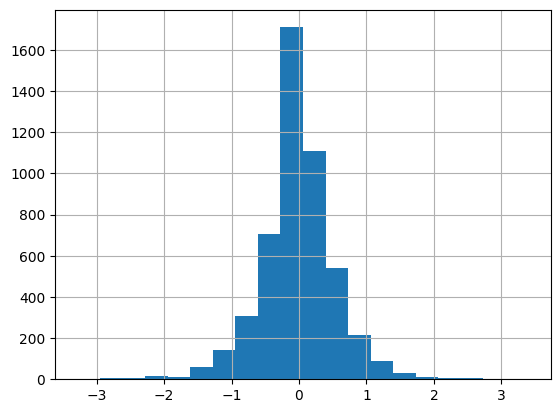

In [32]:
print('Residual plot')
(y_test - clf.predict(X_test)).hist(bins=20)
plt.show()

### CatBoost

In [33]:
from catboost import CatBoostRegressor, Pool
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features = ['neighbourhood_group_cleansed', 'room_type', 
            'host_response_rate',
            'host_is_superhost', 'host_identity_verified', 
            'accommodates', 
            'bedrooms', 'beds', 
            'host_has_profile_pic', 'number_of_reviews', 
            'review_scores_value', 
            'minimum_nights', 'maximum_nights', 
            'has_availability', 'availability_30', 'availability_90', 'availability_365', 
            'days_lt', 'new_host', 
            'dist_to_sagrada_familia'] + ['amenity_' + col.lower().replace(' ', '_') for col in top_amenities]


scaler = StandardScaler().fit(df[features[2:]])
df[features[2:]] = scaler.transform(df[features[2:]])
X_train, X_test, y_train, y_test = train_test_split(df[features], df.log_price, train_size=0.7, random_state=256)


In [35]:
categorical_features_indices = np.where(df[features].dtypes != float)[0]

model = CatBoostRegressor(iterations=150, depth=15, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train, cat_features=categorical_features_indices,eval_set=(X_test, y_test),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.7856998	test: 0.7852636	best: 0.7852636 (0)	total: 735ms	remaining: 1m 49s
1:	learn: 0.7458687	test: 0.7512976	best: 0.7512976 (1)	total: 1.38s	remaining: 1m 42s
2:	learn: 0.7085695	test: 0.7199845	best: 0.7199845 (2)	total: 2.03s	remaining: 1m 39s
3:	learn: 0.6731993	test: 0.6895256	best: 0.6895256 (3)	total: 2.65s	remaining: 1m 36s
4:	learn: 0.6410602	test: 0.6629033	best: 0.6629033 (4)	total: 3.28s	remaining: 1m 35s
5:	learn: 0.6129422	test: 0.6398013	best: 0.6398013 (5)	total: 3.9s	remaining: 1m 33s
6:	learn: 0.5851703	test: 0.6150654	best: 0.6150654 (6)	total: 4.13s	remaining: 1m 24s
7:	learn: 0.5621029	test: 0.5979213	best: 0.5979213 (7)	total: 4.84s	remaining: 1m 25s
8:	learn: 0.5406037	test: 0.5816681	best: 0.5816681 (8)	total: 5.43s	remaining: 1m 25s
9:	learn: 0.5209748	test: 0.5668353	best: 0.5668353 (9)	total: 6.03s	remaining: 1m 24s
10:	learn: 0.5030422	test: 0.5544702	best: 0.5544702 (10)	total: 6.65s	remaining: 1m 24s
11:	learn: 0.4871293	test: 0.5431112	best:

94:	learn: 0.1582644	test: 0.3865089	best: 0.3865089 (94)	total: 57.7s	remaining: 33.4s
95:	learn: 0.1575809	test: 0.3862524	best: 0.3862524 (95)	total: 58.3s	remaining: 32.8s
96:	learn: 0.1565248	test: 0.3860459	best: 0.3860459 (96)	total: 58.9s	remaining: 32.2s
97:	learn: 0.1555523	test: 0.3859260	best: 0.3859260 (97)	total: 59.5s	remaining: 31.5s
98:	learn: 0.1547871	test: 0.3857074	best: 0.3857074 (98)	total: 1m	remaining: 30.9s
99:	learn: 0.1533191	test: 0.3856289	best: 0.3856289 (99)	total: 1m	remaining: 30.3s
100:	learn: 0.1524146	test: 0.3854735	best: 0.3854735 (100)	total: 1m 1s	remaining: 29.7s
101:	learn: 0.1511753	test: 0.3853474	best: 0.3853474 (101)	total: 1m 1s	remaining: 29.1s
102:	learn: 0.1500419	test: 0.3851015	best: 0.3851015 (102)	total: 1m 2s	remaining: 28.5s
103:	learn: 0.1488557	test: 0.3850758	best: 0.3850758 (103)	total: 1m 2s	remaining: 27.9s
104:	learn: 0.1477121	test: 0.3848853	best: 0.3848853 (104)	total: 1m 3s	remaining: 27.3s
105:	learn: 0.1463369	test: 

In [36]:
print("R2 =", metrics.r2_score(y_test, model.predict(X_test)))
print("MEDIAN absolute error =", metrics.median_absolute_error(y_test, model.predict(X_test)))
print("MEAN absolute error =", metrics.mean_absolute_error(y_test, model.predict(X_test)))

R2 = 0.7866825246470184
MEDIAN absolute error = 0.19427788848952976
MEAN absolute error = 0.27542304901435066


In [39]:
metrics.mean_squared_error(y_test, model.predict(X_test), squared=False)

0.380779808135921

In [38]:
metrics.mean_absolute_percentage_error(y_test, model.predict(X_test))

0.0652573386373283

In [41]:
print('top 10 features:')
pd.DataFrame(model.feature_importances_, index=features
            ).sort_values(0, ascending=False).rename(columns={0:'importance'}).head(10)

top 10 features:


,importance
minimum_nights,11.035884
accommodates,10.012540
dist_to_sagrada_familia,6.923932
days_lt,5.180497
maximum_nights,4.617794
availability_30,4.558864
availability_90,4.516990
host_response_rate,4.212833
room_type,4.031770
review_scores_value,3.530256


**What does that mean?**

Our data describe our model for 78%. To improve that next steps required:

1. Understand data better
2. Finetune CatBoost algorithm
3. Add more features/gather new data
4. Add tests for checking data and model